In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards_locationdata.csv')

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   latitude   longitude  postal_code     address                 closest_mrt  \
0  1.303671  103.864479     190001.0  1 BEACH RD  Nicoll Highway MRT Station   
1  1.303671  103.864479     190001.0  1 BEACH RD  Nicoll Highway MRT Station   
2  1.303671  103.864479     190001.0  1 BEACH RD  Nicoll Highway MRT Station   
3  1.303671  103.864479     190001.0  1 BEACH RD  Nicoll Highway MRT Station   
4  1.303671  103.864479     190001.0  1 BEACH RD  Nicoll Highway MRT Station   

   closest_mrt_dist     cbd_dist    month             town flat_type block  \
0        441.785021  2715.822202  2017-04  KALLANG/WHAMPOA    3 ROOM     1   
1        441.785021  2715.822202  2017-05  KALLANG/WHAMPOA    3 ROOM     1   
2        441.785021  2715.822202  2017-06  KALLANG/WHAMPOA    3 ROOM     1   
3        441.785021  2715.822202  2017-11  KALLANG/WHAMPOA    3 ROOM     1   
4        441.785021  2715.822202  2018-04  KALLANG/WHAMPOA    3 ROOM     1   

  street_name storey_

In [ ]:

print("\nData types of each column:")
print(df.info())


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150443 entries, 0 to 150442
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   latitude             150443 non-null  float64
 1   longitude            150443 non-null  float64
 2   postal_code          150437 non-null  float64
 3   address              150443 non-null  object 
 4   closest_mrt          150443 non-null  object 
 5   closest_mrt_dist     150443 non-null  float64
 6   cbd_dist             150443 non-null  float64
 7   month                150443 non-null  object 
 8   town                 150443 non-null  object 
 9   flat_type            150443 non-null  object 
 10  block                150443 non-null  object 
 11  street_name          150443 non-null  object 
 12  storey_range         150443 non-null  object 
 13  floor_area_sqm       150443 non-null  float64
 14  flat_model           150443 non-null  ob

In [ ]:
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
            latitude      longitude    postal_code  closest_mrt_dist  \
count  150443.000000  150443.000000  150437.000000     150443.000000   
mean        1.367630     103.842141  561123.579272        830.896701   
std         0.042771       0.070978  191631.453235        466.426670   
min         1.270380     103.685228   50004.000000         31.759821   
25%         1.336853     103.782720  510151.000000        473.610971   
50%         1.367892     103.847213  560565.000000        740.614502   
75%         1.396070     103.899542  730206.000000       1102.746652   
max         1.457071     103.987805  825195.000000       3496.402761   

            cbd_dist  floor_area_sqm  lease_commence_date  resale_price  \
count  150443.000000   150443.000000        150443.000000  1.504430e+05   
mean    12411.320868       97.543048          1995.566886  4.803595e+05   
std      4396.976965       24.076329            13.766468  1.661938e+05   
min      

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
latitude               0
longitude              0
postal_code            6
address                0
closest_mrt            0
closest_mrt_dist       0
cbd_dist               0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
year                   0
years_remaining        0
dtype: int64


In [ ]:
print("\nUnique values in categorical columns:")
for column in df.select_dtypes(include=["object"]).columns:
    print(f"{column}: {df[column].nunique()} unique values")
    # if the number of unique values is less than 50, print all unique values for review
    if df[column].nunique() < 50:
        print(df[column].unique())


Unique values in categorical columns:
address: 9441 unique values
closest_mrt: 96 unique values
month: 76 unique values
town: 26 unique values
['KALLANG/WHAMPOA' 'BEDOK' 'PASIR RIS' 'BUKIT MERAH' 'QUEENSTOWN'
 'GEYLANG' 'HOUGANG' 'TOA PAYOH' 'SERANGOON' 'MARINE PARADE' 'WOODLANDS'
 'BUKIT TIMAH' 'CHOA CHU KANG' 'CENTRAL AREA' 'ANG MO KIO' 'BISHAN'
 'BUKIT BATOK' 'CLEMENTI' 'BUKIT PANJANG' 'JURONG EAST' 'SENGKANG'
 'TAMPINES' 'YISHUN' 'PUNGGOL' 'SEMBAWANG' 'JURONG WEST']
flat_type: 7 unique values
['3 ROOM' '5 ROOM' '4 ROOM' 'EXECUTIVE' '2 ROOM' 'MULTI-GENERATION'
 '1 ROOM']
block: 2656 unique values
street_name: 564 unique values
storey_range: 17 unique values
['07 TO 09' '13 TO 15' '04 TO 06' '01 TO 03' '16 TO 18' '10 TO 12'
 '22 TO 24' '19 TO 21' '25 TO 27' '28 TO 30' '34 TO 36' '31 TO 33'
 '37 TO 39' '40 TO 42' '46 TO 48' '49 TO 51' '43 TO 45']
flat_model: 21 unique values
['Improved' 'Model A' 'New Generation' 'Standard' 'Adjoined flat'
 'Apartment' 'Maisonette' 'Simplified' 'Mode

The dataset has 150443 entries and 20 columns

postal_code has 6 missing values

month is an object type but represents dates YYYY-MM

remaining_lease is an  with values like '61 years 05 months' which need to be converted to a numerical format

story_range is an object type like '07 TO 09' which can be converted to a numerical representation e.g mid point

Columns that need encoding as it is object type (address, closest_mrt, town, flat_type, block, street_name, storey_range, flat_model, remaining_lease)


In [ ]:

print(f"\nShape before dropping missing postal_code: {df.shape}")

df.dropna(subset=["postal_code"], inplace=True)

print(f"Shape after dropping missing postal_code: {df.shape}")


Shape before dropping missing postal_code: (150443, 20)
Shape after dropping missing postal_code: (150437, 20)


In [ ]:
#  function to convert the remaining_lease string into a numerical value (years)
def convert_remaining_lease(lease_str):
    # Check if the input is a pandas NaN value, if yes, return numpy NaN
    if pd.isna(lease_str):
        return np.nan
    # Convert the input to a string and make it lowercase for consistent processing
    lease_str = str(lease_str).lower()
    
    years = 0
    months = 0
    
    # Split the string by 'years' to separate the years part from the months part
    parts = lease_str.split('years')
    if len(parts) > 0:
        try:
            years = int(parts[0].strip())
        except ValueError:
            pass # Handle cases where years part is not a valid integer
            
    # Check if there's a months part and extract it
    if len(parts) > 1 and 'months' in parts[1]:
        months_part = parts[1].split('months')[0].strip()
        try:
            months = int(months_part)
        except ValueError:
            pass # Handle cases where months part is not a valid integer
            
    # If both years and months are 0, it likely means the format was not recognized
    if years == 0 and months == 0 and 'years' not in lease_str and 'months' not in lease_str:
        return np.nan # Return NaN for unrecognized formats

    return years + months / 12


In [11]:

# Apply the convert_remaining_lease function to the remaining_lease column and store the result in a new column remaining_lease_years
df["remaining_lease_years"] = df["remaining_lease"].apply(convert_remaining_lease)
# Print a confirmation message
print("\nConverted remaining_lease to remaining_lease_years (numerical).")
# Display the original and new columns to verify the conversion
print(df[["remaining_lease", "remaining_lease_years"]].head())


Converted remaining_lease to remaining_lease_years (numerical).
      remaining_lease  remaining_lease_years
0  61 years 05 months              61.416667
1  61 years 05 months              61.416667
2  61 years 03 months              61.250000
3  60 years 10 months              60.833333
4  60 years 05 months              60.416667


In [12]:
# Convert the 'month' column to datetime objects using the specified format '%Y-%m'
df["month"] = pd.to_datetime(df["month"], format="%Y-%m")
# Print a confirmation message
print("\nConverted month to datetime format.")
# Display the converted 'month' column
print(df[["month"]].head())


Converted month to datetime format.
       month
0 2017-04-01
1 2017-05-01
2 2017-06-01
3 2017-11-01
4 2018-04-01


In [13]:
# Define a function to convert the storey_range string into a numerical midpoint
def convert_storey_range(storey_str):
    # Check if the input is a pandas NaN value, if yes, return numpy NaN
    if pd.isna(storey_str):
        return np.nan
    # Split the string by ' TO ' to get the lower and upper bounds of the storey range
    parts = storey_str.split(" TO ")
    # Convert the lower bound to an integer
    lower = int(parts[0])
    # Convert the upper bound to an integer
    upper = int(parts[1])
    # Calculate and return the midpoint of the storey range
    return (lower + upper) / 2


In [14]:
# Apply the convert_storey_range function to the storey_range column and store the result in a new column storey_mid
df["storey_mid"] = df["storey_range"].apply(convert_storey_range)
# Print a confirmation message
print("\nConverted storey_range to storey_mid (numerical average).")
# Display the original and new columns to verify the conversion
print(df[["storey_range", "storey_mid"]].head())


Converted storey_range to storey_mid (numerical average).
  storey_range  storey_mid
0     07 TO 09         8.0
1     07 TO 09         8.0
2     07 TO 09         8.0
3     07 TO 09         8.0
4     13 TO 15        14.0


In [15]:
# Ensure the 'month' column is converted to datetime objects after loading from CSV
# This is crucial for extracting time-based features like 'quarter'
df["month"] = pd.to_datetime(df["month"])

# 1. Create 'age_of_flat' feature
# Calculate the age of the flat by subtracting the lease commencement year from the current year of resale
df["age_of_flat"] = df["year"] - df["lease_commence_date"]
# Print a confirmation message for the created feature
print("\nCreated 'age_of_flat' feature.")
# Display the relevant columns to show the effect of the new feature creation
print(df[["year", "lease_commence_date", "age_of_flat"]].head())


Created 'age_of_flat' feature.
   year  lease_commence_date  age_of_flat
0  2017                 1979           38
1  2017                 1979           38
2  2017                 1979           38
3  2017                 1979           38
4  2018                 1979           39


In [16]:
# 3. Extract quarter from 'month' feature
# Extract the quarter (1-4) from the 'month' datetime column
# This captures seasonality in resale prices
df["quarter"] = df["month"].dt.quarter
# Print a confirmation message for the created feature
print("\nExtracted 'quarter' from 'month'.")
# Display the relevant columns to show the effect of the new feature creation
print(df[["month", "quarter"]].head())


Extracted 'quarter' from 'month'.
       month  quarter
0 2017-04-01        2
1 2017-05-01        2
2 2017-06-01        2
3 2017-11-01        4
4 2018-04-01        2


In [17]:
# Print a message indicating the start of outlier handling
print("\nHandling outliers for numerical columns using IQR method")
# Get a list of all numerical columns in the dataframe
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'postal_code' and 'year' from outlier removal as they are identifiers or time related and not numerical features for outlier detection
numerical_cols = [col for col in numerical_cols if col not in ['postal_code', 'year']]

# Go through each numerical column to detect and remove outliers
for col in numerical_cols:
    # Calculate the first quartile (25th percentile)
    Q1 = df[col].quantile(0.25)
    # Calculate the third quartile (75th percentile)
    Q3 = df[col].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Calculate the lower bound for outlier detection (Q1 - 1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    # Calculate the upper bound for outlier detection (Q3 + 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    # Store the initial number of rows before outlier removal for this column
    initial_rows = df.shape[0]
    # Filter the dataframe to keep only rows where the column's value is within the calculated bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    # Calculate the number of rows removed (outliers)
    rows_removed = initial_rows - df.shape[0]
    # If any rows were removed, print a message indicating how many and from which column
    if rows_removed > 0:
        print(f"  Removed {rows_removed} outliers from {col}")

# Print the final shape of the dataframe after all outlier removals
print(f"Shape after outlier removal: {df.shape}")

# Print a message indicating the display of dataframe info after preprocessing
print("\nDataFrame info after preprocessing:")
# Display a summary of the dataframe after all preprocessing steps
print(df.info())



Handling outliers for numerical columns using IQR method
  Removed 2687 outliers from closest_mrt_dist
  Removed 55 outliers from cbd_dist
  Removed 838 outliers from floor_area_sqm
  Removed 3313 outliers from resale_price
  Removed 3929 outliers from storey_mid
Shape after outlier removal: (139615, 24)

DataFrame info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 139615 entries, 0 to 150436
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   latitude               139615 non-null  float64       
 1   longitude              139615 non-null  float64       
 2   postal_code            139615 non-null  float64       
 3   address                139615 non-null  object        
 4   closest_mrt            139615 non-null  object        
 5   closest_mrt_dist       139615 non-null  float64       
 6   cbd_dist               139615 non-null  float64       
 7   month

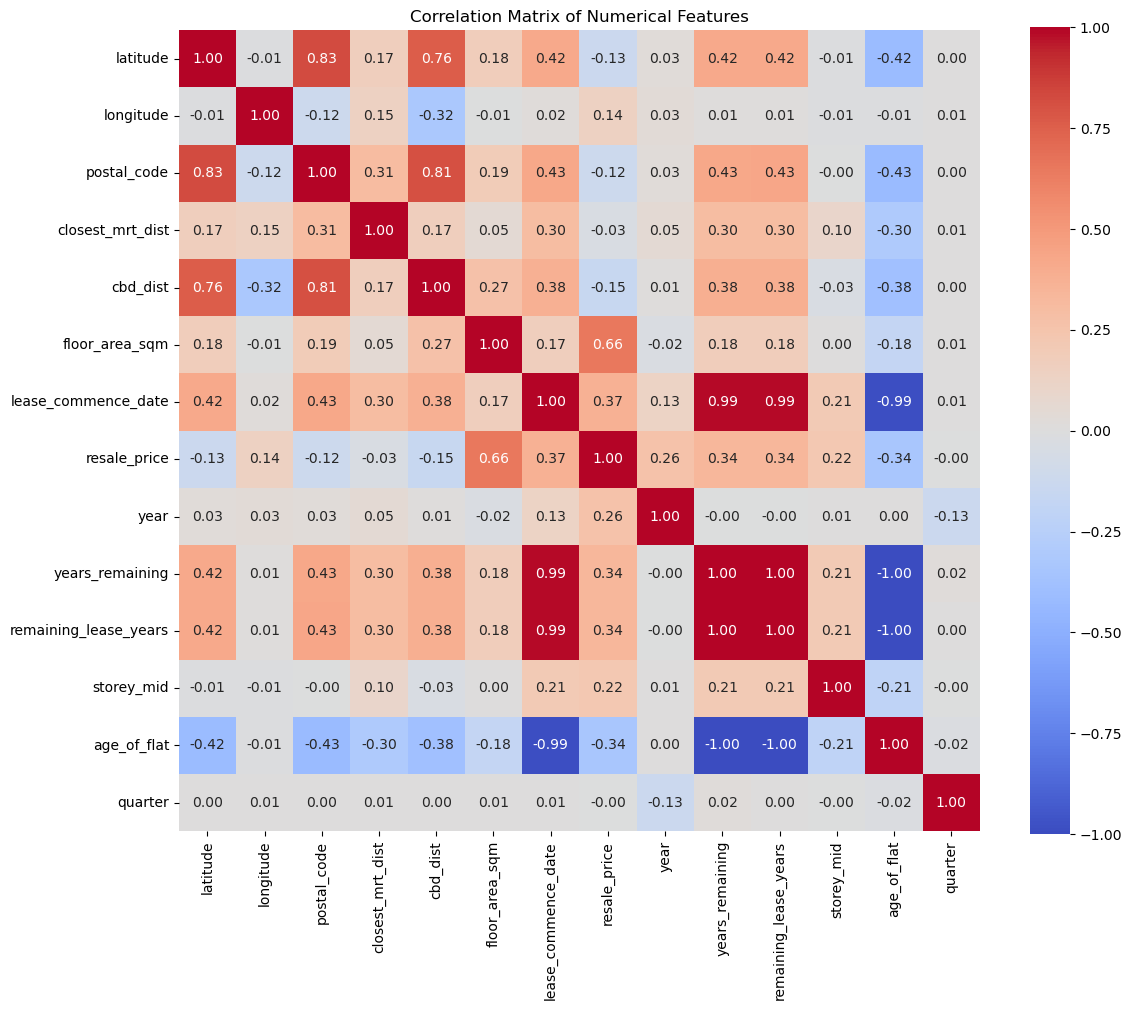

In [18]:

# Ensure 'month' is in datetime format to avoid it being treated as a numerical feature
df["month"] = pd.to_datetime(df["month"])


# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Display the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


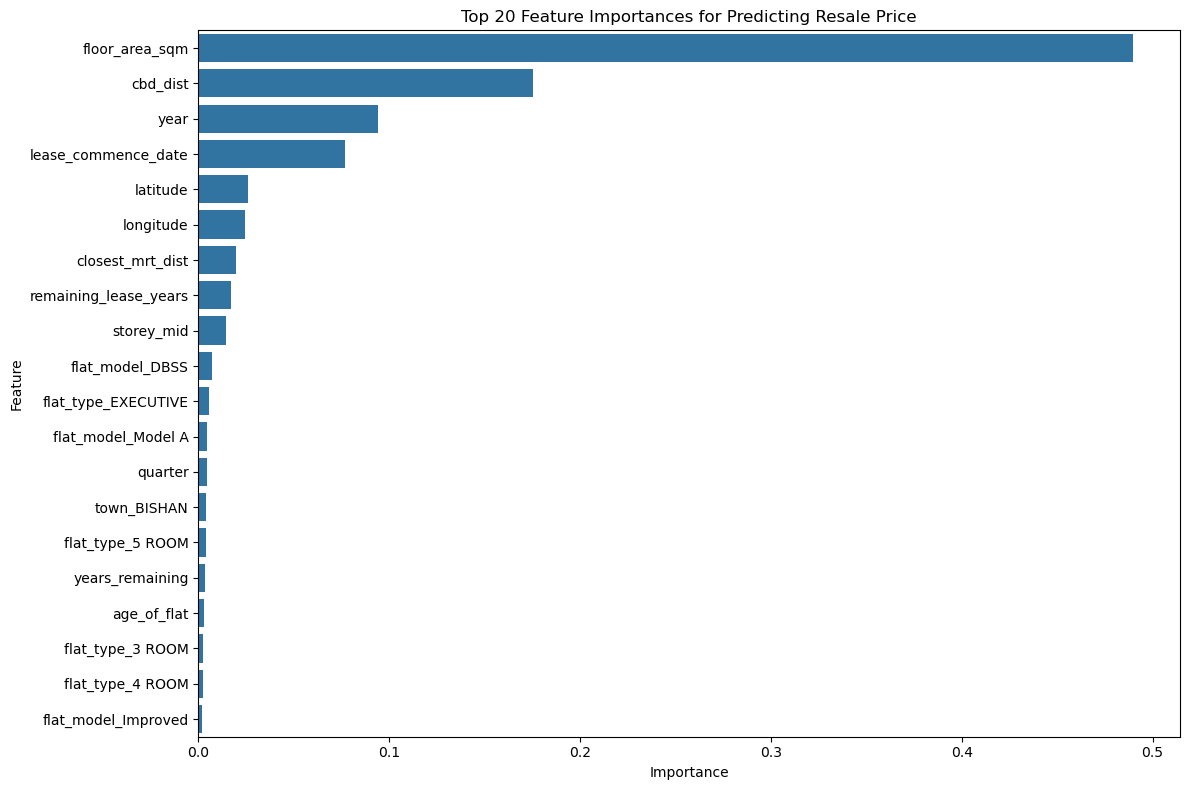

,Feature,Importance
4,floor_area_sqm,0.489869
3,cbd_dist,0.175078
6,year,0.094282
5,lease_commence_date,0.077019
0,latitude,0.025955
1,longitude,0.024349
2,closest_mrt_dist,0.019612
8,remaining_lease_years,0.017286
9,storey_mid,0.014586
145,flat_model_DBSS,0.007354


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Drop columns that won't be used as features
columns_to_drop = [
    "resale_price", "month", "address", "block", "street_name",
    "remaining_lease", "postal_code"  # remove identifiers or leakage
]

# Drop these columns only if they exist
df_model = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# One-hot encode categorical variables again (in case previous step was skipped)
df_model = pd.get_dummies(df_model, drop_first=True)

# Define features and target
X = df_model
y = df["resale_price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(20))
plt.title("Top 20 Feature Importances for Predicting Resale Price")
plt.tight_layout()
plt.show()

# Show the top features in tabular form
feature_importance_df.head(20)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Filter features with importance >= 0.01
important_features = feature_importance_df[feature_importance_df["Importance"] >= 0.01]["Feature"].tolist()

# Keep only important features in X
X_filtered = X[important_features]

# Split again with filtered features
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Retrain the model using filtered features
rf_model_filtered = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_filtered.fit(X_train_f, y_train_f)

# Optional: Evaluate the filtered model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_f = rf_model_filtered.predict(X_test_f)
print("Model performance after dropping low-importance features:")
print(f"MAE:  {mean_absolute_error(y_test_f, y_pred_f):.2f}")
print(f"MSE:  {mean_squared_error(y_test_f, y_pred_f):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_f, y_pred_f)):.2f}")
print(f"R2:   {r2_score(y_test_f, y_pred_f):.4f}")



Model performance after dropping low-importance features:
MAE:  19443.56
MSE:  718878183.13
RMSE: 26811.90
R2:   0.9654


In [21]:

# Define the list of categorical columns to be one-hot encoded
categorical_cols = ["town", "flat_type", "flat_model", "closest_mrt"]
# Initialize OneHotEncoder. handle_unknown=\"ignore\" prevents errors for unseen categories during transformation.
# sparse_output=False ensures the output is a dense NumPy array instead of a sparse matrix.
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# Fit the encoder to the categorical columns and transform them
encoded_features = encoder.fit_transform(df[categorical_cols])
# Create a new DataFrame from the encoded features, using the original DataFrame\'s index
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)
# Concatenate the original DataFrame with the new one-hot encoded DataFrame along columns
df = pd.concat([df, encoded_df], axis=1)

print("\nOne-hot encoded categorical features.")
# Print the shape of the DataFrame after one-hot encoding to show the increased number of columns
print(f"Shape after one-hot encoding: {df.shape}")


One-hot encoded categorical features.
Shape after one-hot encoding: (139615, 172)


In [22]:
X = df.drop(columns=["resale_price", "block", "street_name", "address", "month", "remaining_lease", "postal_code"], errors='ignore')
X = pd.get_dummies(X, drop_first=True)
y = df["resale_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:

results = []


In [24]:
# Linear Regression
print("\nTraining Linear Regression (Default Parameters)...")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

results.append({
    "Model": "Linear Regression",
    "MAE": mae_lr,
    "MSE": mse_lr,
    "RMSE": rmse_lr,
    "R2": r2_lr
})

print(f"  MAE: {mae_lr:.2f}")
print(f"  MSE: {mse_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R2: {r2_lr:.2f}")


Training Linear Regression (Default Parameters)...
  MAE: 40109.30
  MSE: 2575579305.17
  RMSE: 50750.17
  R2: 0.88


In [25]:
print("\nTraining Ridge Regression (Default Parameters)...")
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

results.append({
    "Model": "Ridge",
    "MAE": mae_ridge,
    "MSE": mse_ridge,
    "RMSE": rmse_ridge,
    "R2": r2_ridge
})

print(f"  MAE: {mae_ridge:.2f}")
print(f"  MSE: {mse_ridge:.2f}")
print(f"  RMSE: {rmse_ridge:.2f}")
print(f"  R2: {r2_ridge:.2f}")


Training Ridge Regression (Default Parameters)...
  MAE: 40128.96
  MSE: 2577825323.89
  RMSE: 50772.29
  R2: 0.88


In [26]:
print("\nTraining Lasso Regression (Default Parameters)...")
model_lasso = Lasso(max_iter = 5000)
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

results.append({
    "Model": "Lasso",
    "MAE": mae_lasso,
    "MSE": mse_lasso,
    "RMSE": rmse_lasso,
    "R2": r2_lasso
})

print(f"  MAE: {mae_lasso:.2f}")
print(f"  MSE: {mse_lasso:.2f}")
print(f"  RMSE: {rmse_lasso:.2f}")
print(f"  R2: {r2_lasso:.2f}")


Training Lasso Regression (Default Parameters)...
  MAE: 40122.02
  MSE: 2576739630.79
  RMSE: 50761.60
  R2: 0.88


c:\Users\Legen\OneDrive\Documents\lock\UndownUnlock-main\Miniconda\envs\mldp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e+14, tolerance: 2.324e+11
  model = cd_fast.enet_coordinate_descent(


In [27]:
print("\nTraining Random Forest Regressor (Default Parameters)...")
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

results.append({
    "Model": "Random Forest",
    "MAE": mae_rf,
    "MSE": mse_rf,
    "RMSE": rmse_rf,
    "R2": r2_rf
})

print(f"  MAE: {mae_rf:.2f}")
print(f"  MSE: {mse_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R2: {r2_rf:.2f}")


Training Random Forest Regressor (Default Parameters)...
  MAE: 18724.49
  MSE: 666059899.89
  RMSE: 25808.14
  R2: 0.97


In [28]:
print("\nTraining Gradient Boosting Regressor (Default Parameters)...")
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

results.append({
    "Model": "Gradient Boosting",
    "MAE": mae_gb,
    "MSE": mse_gb,
    "RMSE": rmse_gb,
    "R2": r2_gb
})

print(f"  MAE: {mae_gb:.2f}")
print(f"  MSE: {mse_gb:.2f}")
print(f"  RMSE: {rmse_gb:.2f}")
print(f"  R2: {r2_gb:.2f}")


Training Gradient Boosting Regressor (Default Parameters)...
  MAE: 31025.90
  MSE: 1758404006.34
  RMSE: 41933.33
  R2: 0.92


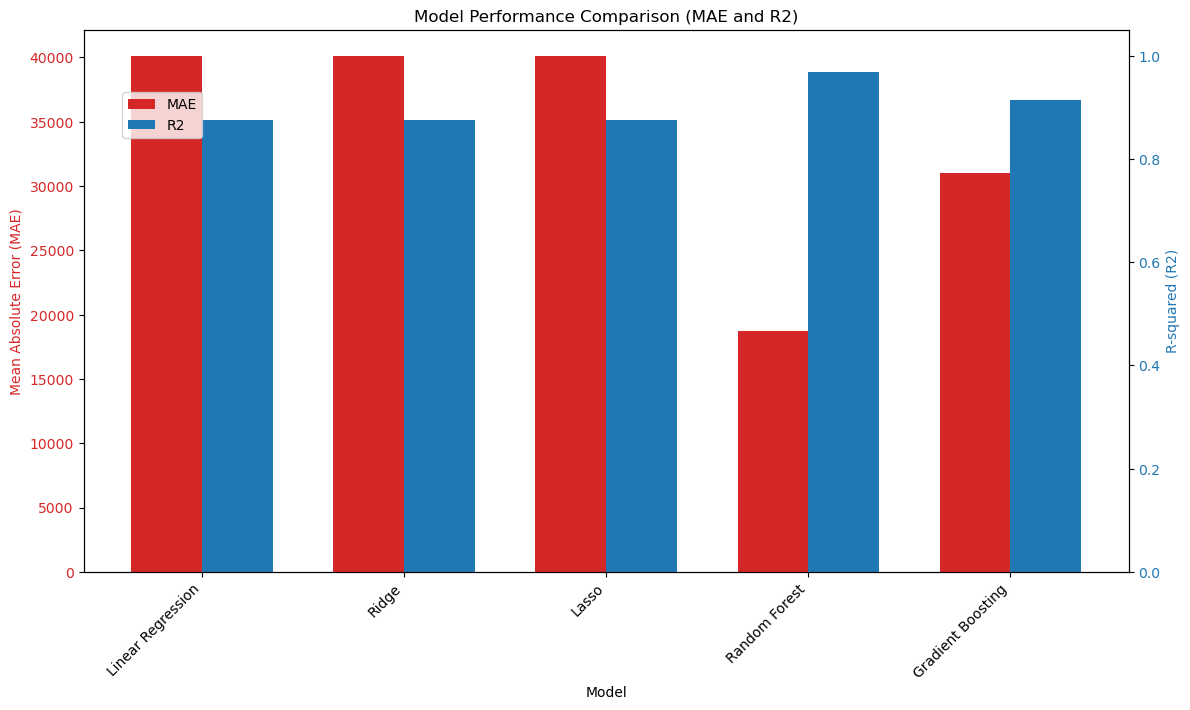

In [29]:
models = [res["Model"] for res in results]
mae_scores = [res["MAE"] for res in results]
r2_scores = [res["R2"] for res in results]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot MAE on primary y-axis
color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Absolute Error (MAE)', color=color)
ax1.bar(x - width/2, mae_scores, width, label='MAE', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha="right")

# Create a second y-axis for R2 scores
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R-squared (R2)', color=color)  # we already handled the x-label with ax1
ax2.bar(x + width/2, r2_scores, width, label='R2', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.05) # R2 is typically between 0 and 1

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model Performance Comparison (MAE and R2)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

In [30]:
all_results = []


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Linear Regression model
model = LinearRegression()

# Define hyperparameter grid (empty for Linear Regression as it has no common hyperparameters to tune)
param_grid = {}

print("\nTraining Linear Regression...")
# Perform GridSearchCV for hyperparameter tuning and model selection
# cv=KFold ensures consistent cross-validation splits across models
# scoring=\"neg_mean_squared_error\" is used because GridSearchCV maximizes the score, and we want to minimize MSE
# verbose=0 suppresses detailed output during grid search
# n_jobs=-1 uses all available CPU cores for parallel processing
grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=3, shuffle=True, random_state=42), scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)
# Fit GridSearchCV on the training data to find the best hyperparameters and train the model
grid_search.fit(X_train, y_train)

# Get the best estimator (model) found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and evaluation metrics for Linear Regression
print(f"  Best parameters: {grid_search.best_params_}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R2: {r2:.2f}")


Training Linear Regression...
  Best parameters: {}
  MAE: 40109.30
  MSE: 2575579305.17
  RMSE: 50750.17
  R2: 0.88


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Ridge Regression model
model = Ridge()

# Define hyperparameter grid for Ridge Regression (alpha is the regularization strength)
param_grid = {"alpha": [0.1, 1.0]}

print("\nTraining Ridge Regression...")
# Perform GridSearchCV for hyperparameter tuning and model selection
grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=3, shuffle=True, random_state=42), scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and evaluation metrics for Ridge Regression
print(f"  Best parameters: {grid_search.best_params_}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R2: {r2:.2f}")


Training Ridge Regression...
  Best parameters: {'alpha': 0.1}
  MAE: 40109.89
  MSE: 2575683230.89
  RMSE: 50751.19
  R2: 0.88


In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Lasso Regression model
model = Lasso()

# Define hyperparameter grid for Lasso Regression (alpha is the regularization strength)
param_grid = {"alpha": [0.1, 1.0]}

print("\nTraining Lasso Regression...")
# Perform GridSearchCV for hyperparameter tuning and model selection
grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=3, shuffle=True, random_state=42), scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and evaluation metrics for Lasso Regression
print(f"  Best parameters: {grid_search.best_params_}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R2: {r2:.2f}")


Training Lasso Regression...
  Best parameters: {'alpha': 0.1}
  MAE: 40116.41
  MSE: 2575936868.94
  RMSE: 50753.69
  R2: 0.88


c:\Users\Legen\OneDrive\Documents\lock\UndownUnlock-main\Miniconda\envs\mldp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+14, tolerance: 2.324e+11
  model = cd_fast.enet_coordinate_descent(


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Random Forest Regressor model with parallel processing
model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define hyperparameter grid for Random Forest Regressor
param_grid = {
    "n_estimators": [200],  # Number of trees in the forest
    "max_depth":  [20]        # Maximum depth of the tree
}

print("\nTraining Random Forest Regressor...")
# Perform GridSearchCV for hyperparameter tuning and model selection
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=KFold(n_splits=3, shuffle=True, random_state=42),
    scoring="neg_mean_squared_error",
    verbose=0,
    n_jobs=-1  # Use all cores during grid search
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and evaluation metrics for Random Forest Regressor
print(f"  Best parameters: {grid_search.best_params_}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R2: {r2:.2f}")



Training Random Forest Regressor...
  Best parameters: {'max_depth': 20, 'n_estimators': 200}
  MAE: 18761.51
  MSE: 668623218.82
  RMSE: 25857.75
  R2: 0.97


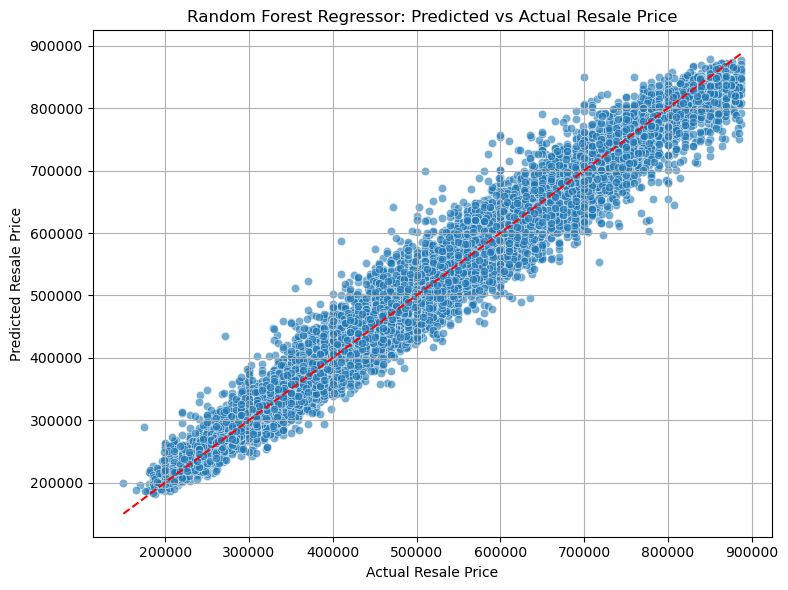

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("Random Forest Regressor: Predicted vs Actual Resale Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Gradient Boosting Regressor model with a fixed random state for reproducibility
model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for Gradient Boosting Regressor
param_grid = {
    "n_estimators": [50,100], # Number of boosting stages to perform
    "learning_rate": [0.1], # Shrinks the contribution of each tree
    "max_depth": [3] # Maximum depth of the individual regression estimators
}

print("\nTraining Gradient Boosting Regressor...")
# Perform GridSearchCV for hyperparameter tuning and model selection
grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=3, shuffle=True, random_state=42), scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and evaluation metrics for Gradient Boosting Regressor
print(f"  Best parameters: {grid_search.best_params_}")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R2: {r2:.2f}")


Training Gradient Boosting Regressor...
  Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
  MAE: 31025.90
  MSE: 1758404006.34
  RMSE: 41933.33
  R2: 0.92


In [39]:
import joblib

joblib.dump(best_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'
